# Challenge: Model Comparison

You now know 2 kinds of regression models and 2 kinds of classifier models. So let's use that to compare models!

Comparing models is something data scientists do all the time. Learning to choose the best model for a given situation is very important.

Find a data set and build a KNN Regression and an OLS regression. Compare the 2. How similar are they? Do they miss in different ways?

Describe the models' behaviors and why you favor 1 model or the other. Is there a situation where you would change your mind, or whether one is unambiguously better than the other? Lastly, Note what it is about the data that causes the better model to outperform the weaker model.

## Data

I will be looking at Boston housing data, found via [Kaggle](https://www.kaggle.com/c/boston-housing/data).

In [1]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor as KNNRegressor
# from sklearn import linear_model
import statsmodels.formula.api as smf
import seaborn as sns

data_url = 'https://storage.googleapis.com/kaggle-competitions-data/kaggle/5315/train.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1526780617&Signature=M07xqrJbBfFAY%2FaQFIj%2BHOYLySG%2Bah2%2F3C%2BO0WoyGmqH4AvQWEV%2FtMTQyMsN4SG7Sblmqou10GcPggvFo1iVAbceo8cLvvDqdTnVCUD5I7JaUrHAZET35Pe%2B88jtYtI9oLhxCnmtdjEHaPf7Q%2FlEoA7aEuuQ01N%2FK0jWbMqIUbOulHD0L0G4AnjSKDhkztixjKUJzHGkBoXnHSFo6uzfZ%2FhOf54Znu9YBMKZRr2ZJ6ZRPYrSTmCRZ7v2xCWZieY7ceQJN79BBNlKtUhVc1478O97WzEol1g7wkBVkmhgswxTWIJbxj0XJjfTiJWqYwK46eTyntkBHIM91l6JTcYrpA%3D%3D'

df = pd.read_csv(data_url, header=0)  
df.set_index('ID', inplace=True)

df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
ID,,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [2]:
# Get rid of unwanted features
df = df.drop(['chas', 'nox', 'rad', 'black'], axis=1)

# Rename columns to be more intuitive
df = df.rename(index=str, columns={
    "crim": "CrimePerCapita", 
    "zn": "RatioResidentialLandOver25KSqFt",
    "indus": "RatioNonRetailAcres",
    "rm": "AvgRooms",
    "age": "RatioBuiltPre1940",
    "dis": "AvgDistancesToEmployment",
    "tax": "PropTaxRatePer10K",
    "ptratio": "RatioPupilTeacher",
    "lstat": "PercentLowerStatus",
    "medv": "MedianValue"
})

df.head()

,CrimePerCapita,RatioResidentialLandOver25KSqFt,RatioNonRetailAcres,AvgRooms,RatioBuiltPre1940,AvgDistancesToEmployment,PropTaxRatePer10K,RatioPupilTeacher,PercentLowerStatus,MedianValue
ID,,,,,,,,,,
1,0.00632,18.0,2.31,6.575,65.2,4.0900,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,6.421,78.9,4.9671,242,17.8,9.14,21.6
4,0.03237,0.0,2.18,6.998,45.8,6.0622,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,7.147,54.2,6.0622,222,18.7,5.33,36.2
7,0.08829,12.5,7.87,6.012,66.6,5.5605,311,15.2,12.43,22.9


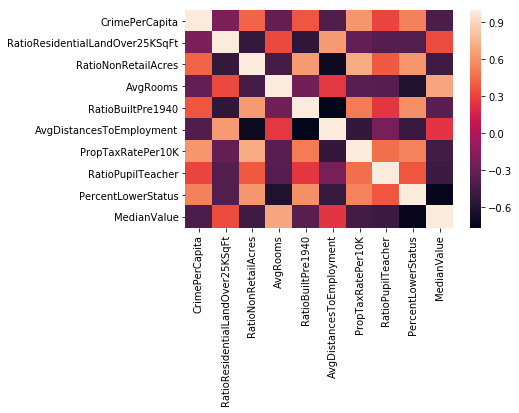

In [3]:
# Get correlation map
sns.heatmap(df.corr())

In [4]:
df = df.drop(['CrimePerCapita', 'RatioNonRetailAcres', 'RatioBuiltPre1940', 'PropTaxRatePer10K', 'RatioPupilTeacher'], axis=1)

# Choose predictors based on correlation map
X = df.iloc[:, 0:4].values
Y = df.iloc[:, 4].values

df.head()

,RatioResidentialLandOver25KSqFt,AvgRooms,AvgDistancesToEmployment,PercentLowerStatus,MedianValue
ID,,,,,
1,18.0,6.575,4.0900,4.98,24.0
2,0.0,6.421,4.9671,9.14,21.6
4,0.0,6.998,6.0622,2.94,33.4
5,0.0,7.147,6.0622,5.33,36.2
7,12.5,6.012,5.5605,12.43,22.9


In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)  

In [6]:
# Normalize features before predicting
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

## Using KNN Regression

In [7]:
regr_1 = KNNRegressor(n_neighbors=5, weights="distance")  
regr_1.fit(X_train, Y_train)  

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='distance')

In [8]:
y_pred = regr_1.predict(X_test)

In [9]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(regr_1, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Weighted Accuracy: 0.31 (+/- 0.57)


## Using OLS Regression

In [10]:
# regr_2 = linear_model.LinearRegression()
# regr_2.fit(X_train, Y_train)  

In [13]:
linear_formula = 'MedianValue ~ RatioResidentialLandOver25KSqFt + AvgRooms + AvgDistancesToEmployment + PercentLowerStatus'

# Fit model to our data using model formula.
regr_2 = smf.ols(formula=linear_formula, data=df).fit()
print('Params:', regr_2.params)

print('\nP-Values:', regr_2.pvalues)

print('\nR-squared (regular vs. adjusted):', regr_2.rsquared, regr_2.rsquared_adj)

Params: Intercept                          8.146931
RatioResidentialLandOver25KSqFt    0.063997
AvgRooms                           4.417674
AvgDistancesToEmployment          -1.117972
PercentLowerStatus                -0.766582
dtype: float64

P-Values: Intercept                          4.525051e-02
RatioResidentialLandOver25KSqFt    2.308951e-04
AvgRooms                           6.194850e-15
AvgDistancesToEmployment           1.656203e-07
PercentLowerStatus                 1.914020e-31
dtype: float64

R-squared (regular vs. adjusted): 0.664336428954 0.66024297077
